In [1]:
import pandas as pd
import seaborn as sea
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn import datasets

# Importing the necessary libraries to execute the DBSCAN method
from sklearn.cluster import DBSCAN
from collections import Counter

In [23]:
# Iris Datasets
iris_org=datasets.load_iris()

#Creating our dataframe
iris=pd.DataFrame(iris_org.data,columns= iris_org.feature_names)
iris['species']=iris_org.target
iris['species']=iris['species'].astype(int)

iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [24]:
# Edit columns names
iris.columns=iris.columns.str.replace("(","")
iris.columns=iris.columns.str.replace(")","")
iris.columns=iris.columns.str.replace(" ","_")
iris.columns=iris.columns.str.replace("_cm","")

# Filling the target 
def flowers(value):
    flower=iris_org.target_names[value]
    return flower
iris.species=iris.species.apply(flowers)

iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [25]:
iris.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [30]:
data = iris.iloc[:,0:4]
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [103]:
model = DBSCAN(eps = 0.8, min_samples = 30).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=30, n_jobs=None, p=None)


In [104]:
outliers = iris
print(Counter(model.labels_))

Counter({1: 83, 0: 50, -1: 17})


In [105]:
outlier[model.labels_ == -1].head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
57,4.9,2.4,3.3,1.0,versicolor
60,5.0,2.0,3.5,1.0,versicolor


In [106]:
rcParams['figure.figsize'] = (10,5)
sea.set_style('whitegrid')

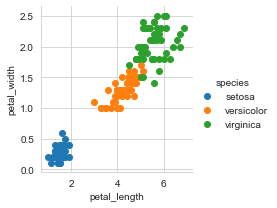

In [107]:
g = sea.FacetGrid(iris, hue = 'species')
g = g.map(plt.scatter, 'petal_length', 'petal_width')
g = g.add_legend()
plt.show()

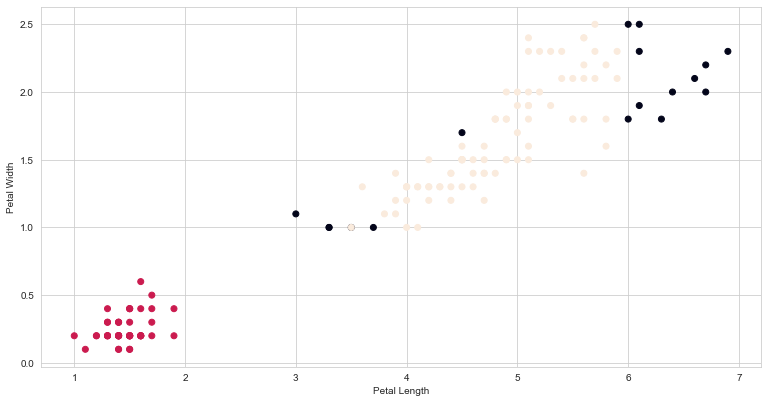

In [108]:
fig = plt.figure()

ax = fig.add_axes([1,1,1,1])

colors = model.labels_

ax.scatter(data.petal_length, data.petal_width, c = colors)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
plt.show()